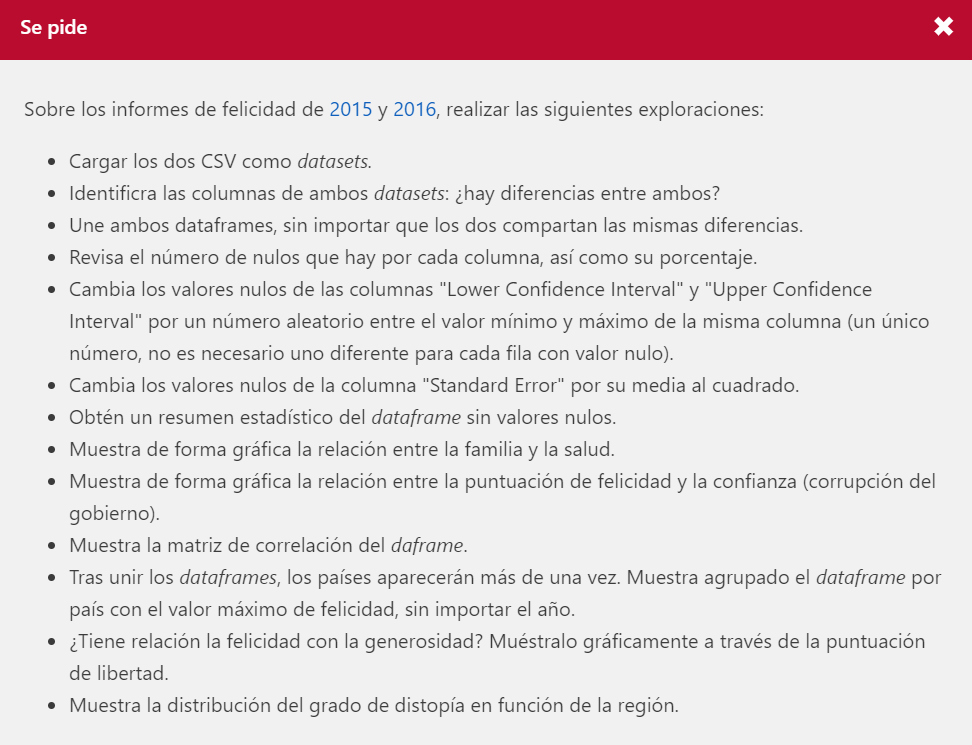

In [1]:
from IPython import display
display.Image("instrucciones_py.PNG", width=700)

## Cargar los dos CSV como datasets.

## Identificra las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [2]:
# Utilizo un script propio para utilizar el método pprint y visualizar de mejor manera los dataframes
from utils import add_pprint
add_pprint()
import pandas as pd

In [3]:
data_2015 = pd.read_csv('2015.csv')
print(data_2015.shape)
# data_2015.head(3)
data_2015.pprint()

(158, 12)


In [4]:
data_2016 = pd.read_csv('2016.csv')
print(data_2016.shape)
data_2016.pprint(3)

(157, 13)


In [5]:
# Hay diferencias en las columnas, y 1 registro más en 2016

## Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [6]:
data = pd.concat([data_2015, data_2016], ignore_index=False, keys=[2015, 2016], sort=True)
print(data.shape)
data.pprint()

(315, 14)


In [7]:
data.tail().pprint()

## Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [8]:
def show_nulls(df):
    # Nulos totales
    total_nan = df.isnull().sum()
    # Porcentaje nulos
    perc_nan = total_nan/len(df)*100
    
    return total_nan, perc_nan

In [9]:
pd.DataFrame(show_nulls(data)).set_index([pd.Index(['total_nan', 'perc_nan'])]).pprint()

In [10]:
# show_nulls(data)

## Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [11]:
df_ci = data.loc[[2016]][['Lower Confidence Interval', 'Upper Confidence Interval']]

In [12]:
df_ci.min()

Lower Confidence Interval                  2.732
Upper Confidence Interval                  3.078
dtype: float64

In [13]:
df_ci.max()

Lower Confidence Interval                  7.460
Upper Confidence Interval                  7.669
dtype: float64

In [14]:
lci_min = df_ci.min()['Lower Confidence Interval']
lci_max = df_ci.max()['Lower Confidence Interval']

uci_min = df_ci.min()['Upper Confidence Interval']
uci_max = df_ci.max()['Upper Confidence Interval']

In [15]:
import random

In [16]:
lci_rand = round(random.uniform(lci_min, lci_max), 3)
lci_rand

6.089

In [17]:
uci_rand = round(random.uniform(uci_min, uci_max), 3)
uci_rand

3.431

In [18]:
data.fillna({'Lower Confidence Interval': lci_rand, 'Upper Confidence Interval': uci_rand}, inplace=True)

## Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [19]:
se_value = data['Standard Error'].mean()
se_value

0.04788474683544304

In [20]:
data.loc[[2015]]['Standard Error'].mean()

0.04788474683544304

In [21]:
data.fillna({'Standard Error': se_value**2}, inplace=True)

## Obtén un resumen estadístico del dataframe sin valores nulos.

In [22]:
show_nulls(data)

(Country                          0
 Dystopia Residual                0
 Economy (GDP per Capita)         0
 Family                           0
 Freedom                          0
 Generosity                       0
 Happiness Rank                   0
 Happiness Score                  0
 Health (Life Expectancy)         0
 Lower Confidence Interval        0
 Region                           0
 Standard Error                   0
 Trust (Government Corruption)    0
 Upper Confidence Interval        0
 dtype: int64,
 Country                                        0.000
 Dystopia Residual                              0.000
 Economy (GDP per Capita)                       0.000
 Family                                         0.000
 Freedom                                        0.000
 Generosity                                     0.000
 Happiness Rank                                 0.000
 Happiness Score                                0.000
 Health (Life Expectancy)                       0

In [23]:
data.describe().pprint(50)

## Muestra de forma gráfica la relación entre la familia y la salud.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def ecdf(data):
        """Compute ECDF for a one-dimensional array of measurements."""
        # Number of data points: n
        n = len(data)

        # x-data for the ECDF: x
        x = np.sort(data)

        # y-data for the ECDF: y
        y = np.arange(1, n+1) / n

        return x, y
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
sns.set_style('darkgrid')
sns.set(style='white')
# plt.rcParams["figure.figsize"] = (8,5)
# plt.rcParams["figure.figsize"] = (15,6)

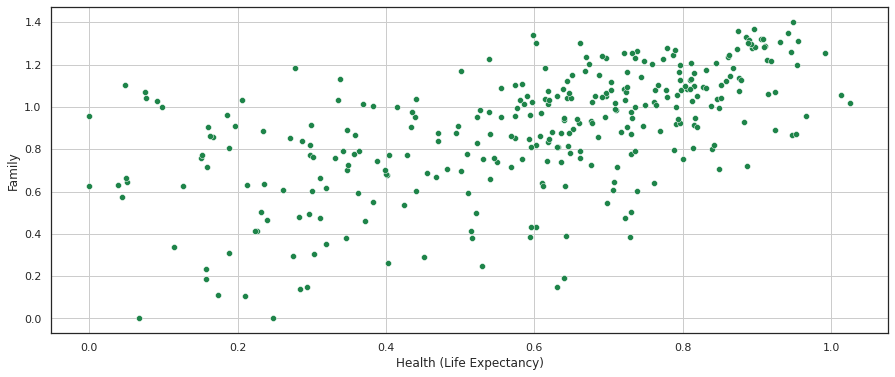

In [26]:
plt.rcParams["figure.figsize"] = (15,6)
sns.scatterplot(x='Health (Life Expectancy)', y='Family', data=data, alpha=1, color='#1E8449')
plt.grid()

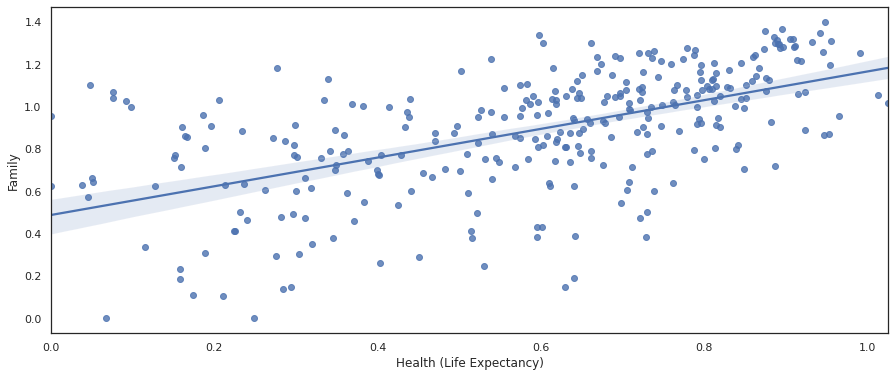

In [27]:
_ = sns.regplot(x='Health (Life Expectancy)', y='Family', data=data)
# plt.grid()

## Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

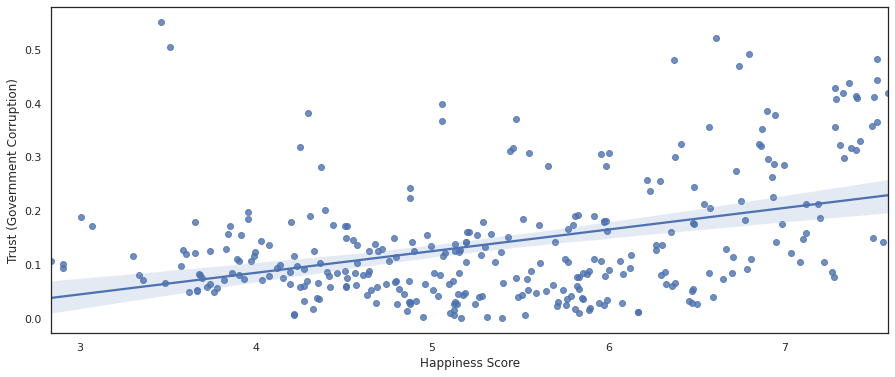

In [28]:
_ = sns.regplot(x='Happiness Score', y='Trust (Government Corruption)', data=data)

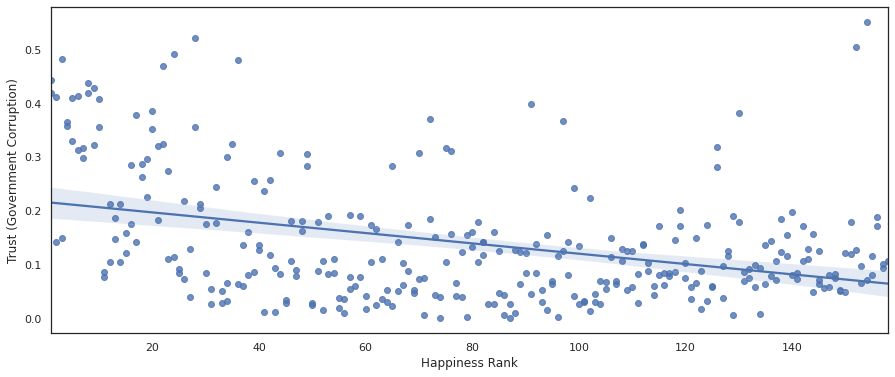

In [29]:
_ = sns.regplot(x='Happiness Rank', y='Trust (Government Corruption)', data=data)

## Muestra la matriz de correlación del daframe.

In [30]:
data.corr().pprint(500)

In [31]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

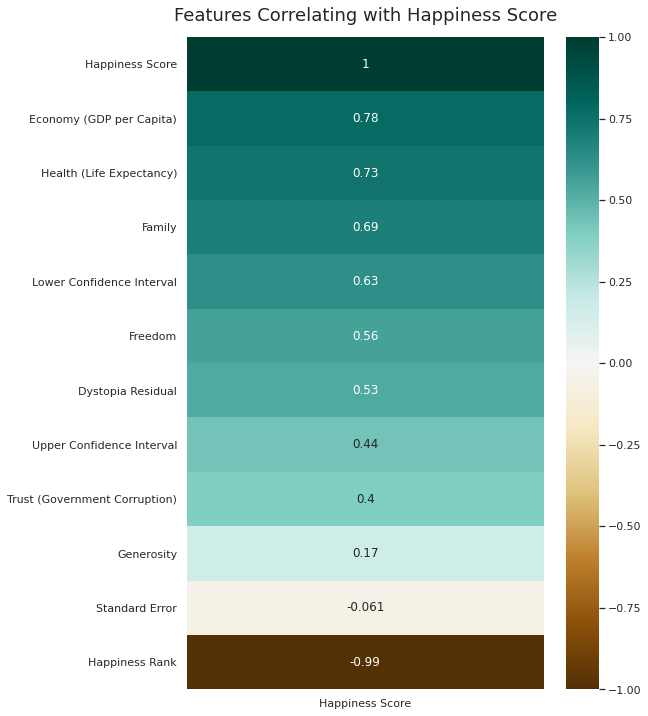

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Happiness Score']].sort_values(by='Happiness Score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
_ = heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':18}, pad=16)

## Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [33]:
data.groupby('Country').agg({'Happiness Score': 'max'}).sort_values(by='Happiness Score', ascending=False).pprint(500)

## ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

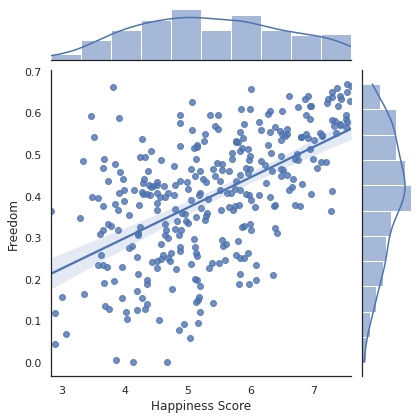

In [34]:
_ = sns.jointplot(y="Freedom",
                  x="Happiness Score",
                  kind='reg',
                  data=data)

In [35]:
_ = sns.jointplot(y="Generosity",
                  x="Happiness Score",
                  kind='reg',
                  data=data)

In [36]:
_ = sns.jointplot(x="Generosity",
                  y="Freedom",
                  kind='reg',
                  data=data)

In [37]:
sns.jointplot(data=data, y='Generosity', x='Happiness Score', hue='Freedom')

In [38]:
plt.rcParams["figure.figsize"] = (15,6)
sns.scatterplot(y='Generosity', x='Happiness Score', hue='Freedom', data=data)
plt.grid()

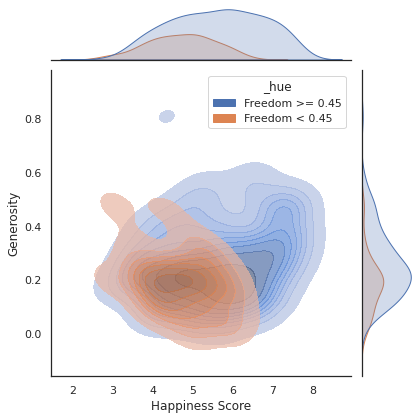

In [39]:
data['_hue'] =data['Freedom'].apply(lambda x:  np.where([x >= 0.30], 'Freedom >= 0.45', 'Freedom < 0.45')[0])
sns.jointplot(y='Generosity', x='Happiness Score', hue='_hue', data=data, kind='kde',
              fill=True, joint_kws={'alpha': 0.7})

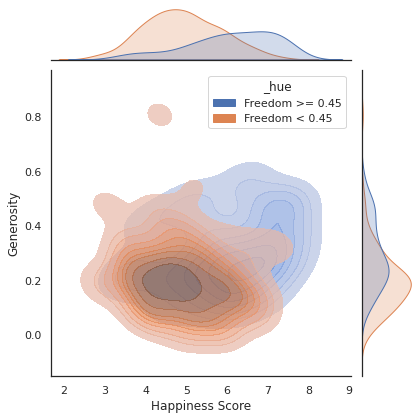

In [40]:
data['_hue'] =data['Freedom'].apply(lambda x:  np.where([x >= 0.45], 'Freedom >= 0.45', 'Freedom < 0.45')[0])
sns.jointplot(y='Generosity', x='Happiness Score', hue='_hue', data=data, kind='kde',
              fill=True, joint_kws={'alpha': 0.7})

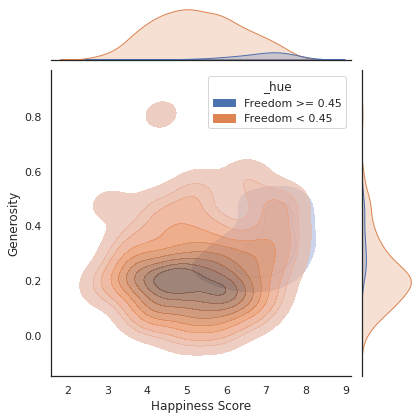

In [41]:
data['_hue'] =data['Freedom'].apply(lambda x:  np.where([x >= 0.6], 'Freedom >= 0.45', 'Freedom < 0.45')[0])
sns.jointplot(y='Generosity', x='Happiness Score', hue='_hue', data=data, kind='kde',
              fill=True, joint_kws={'alpha': 0.7})

## Muestra la distribución del grado de distopía en función de la región.

In [42]:
Dystopia = data.groupby('Region').agg({'Dystopia Residual': 'mean'}).sort_values(by='Dystopia Residual', ascending=False)
Dystopia.reset_index(inplace=True)
Dystopia.pprint(500)

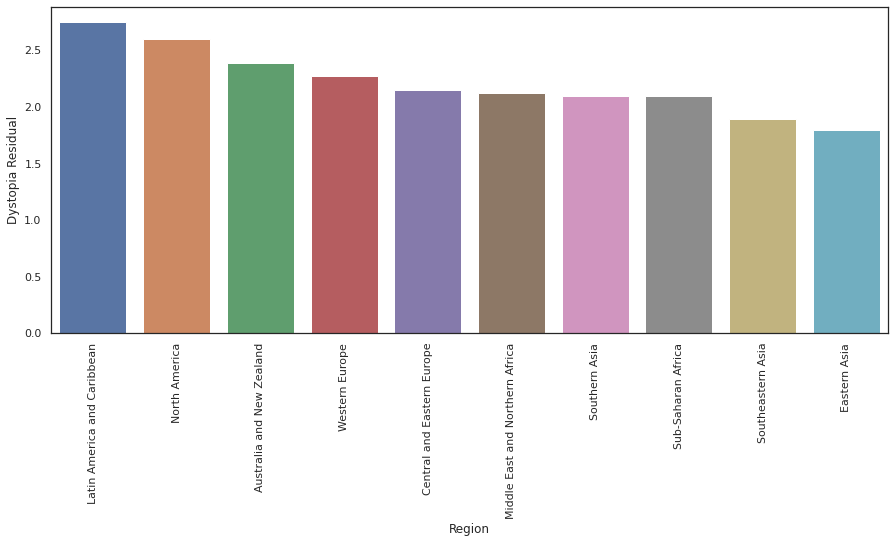

In [43]:
_ = sns.barplot(x='Region', y='Dystopia Residual', data=Dystopia)
_ = plt.xticks(rotation=90)

In [44]:
Dystopia_countrys = data.groupby('Country').agg({'Dystopia Residual': 'mean', 'Region': 'last'}).sort_values(by='Dystopia Residual', ascending=False)
Dystopia_countrys.reset_index(inplace=True)
Dystopia_countrys.pprint(500)

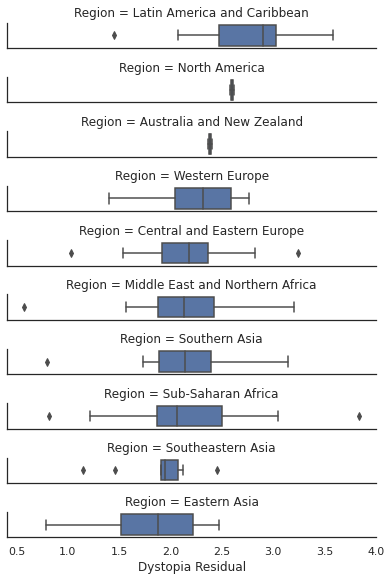

In [45]:
# plt.rcParams["figure.figsize"] = (6,15)
# plt.figure(figsize=(45,10))
_ = sns.factorplot(data=Dystopia_countrys,
                   x='Dystopia Residual',
                   kind='box',
                   row='Region',
                   row_order = Dystopia['Region'],
                   height=0.8, aspect=7)